In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats
import sklearn.metrics as metrics

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

#Setting Options
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [4]:
# Scraping player's characteristics data from website
player_list = []
i=0
while i<3000:
    url_list = "https://sofifa.com/?&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=rc&showCol%5B%5D=ta&showCol%5B%5D=cr&showCol%5B%5D=fi&showCol%5B%5D=he&showCol%5B%5D=sh&showCol%5B%5D=vo&showCol%5B%5D=ts&showCol%5B%5D=dr&showCol%5B%5D=cu&showCol%5B%5D=fr&showCol%5B%5D=lo&showCol%5B%5D=bl&showCol%5B%5D=to&showCol%5B%5D=ac&showCol%5B%5D=sp&showCol%5B%5D=ag&showCol%5B%5D=re&showCol%5B%5D=ba&showCol%5B%5D=tp&showCol%5B%5D=so&showCol%5B%5D=ju&showCol%5B%5D=st&showCol%5B%5D=sr&showCol%5B%5D=ln&showCol%5B%5D=te&showCol%5B%5D=ar&showCol%5B%5D=in&showCol%5B%5D=po&showCol%5B%5D=vi&showCol%5B%5D=pe&showCol%5B%5D=cm&showCol%5B%5D=td&showCol%5B%5D=ma&showCol%5B%5D=sa&showCol%5B%5D=sl&showCol%5B%5D=tg&showCol%5B%5D=gd&showCol%5B%5D=gh&showCol%5B%5D=gc&showCol%5B%5D=gp&showCol%5B%5D=gr&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=ir&showCol%5B%5D=pac&showCol%5B%5D=sho&showCol%5B%5D=pas&showCol%5B%5D=dri&showCol%5B%5D=def&showCol%5B%5D=phy&offset="+str(i)
    response = requests.get(url_list)
    page = response.text
    soup = BeautifulSoup(page,"lxml")
    rows = soup.find_all("tr")
    #print(rows)
    for row in rows:
        cells = row.find_all('td')
        cells_to_string = str(cells) #print(cells)
        cells_sub = (re.sub(re.compile('<.*?>'),'',cells_to_string)) #print(cells_sub)
        player_list.append(cells_sub)
        result = pd.DataFrame(player_list)
    i+=60
        

In [5]:
print("No. of all rows")
print(len(result))
print("")
print("No. of rows without duplicated")
result.drop_duplicates(subset=None,keep="first",inplace=True)
print(len(result))

No. of all rows
2883

No. of rows without duplicated
2792


In [7]:
#saving and reading
result.to_pickle("PlayerListInitialPickle")
result = pd.read_pickle("PlayerListInitialPickle")

In [8]:
#getting column names
table_players = soup.find("table",attrs={"class":"table table-hover persist-area"})
header_players = table_players.find_all("th")
column_name_players = []
for row in header_players:
    column_name_players.append(row.text)
column_name_players

['',
 'Name',
 'Age',
 'OVA',
 'POT',
 'Team & Contract',
 'ID',
 'Height',
 'Weight',
 'foot',
 'BOV',
 'BP',
 'Growth',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits']

In [12]:
#setting column names
new_column_name_players = [
 'Name',
 'Age',
 'Overall',
 'Potential',
 'Team',
 'Height',
 'Weight',
 'Foot',
 'Best_Overall',
 'Position',
 'Growth',
 'Value',
 'Wage',
 'Release_Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY'
]

In [13]:
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
1,[\n\n\n\n\nFIFA 21 Jul 30,2021International Reputation 2 ★ ↘ 1 ★\n,\n A. D'AlessandroCAM RM,39,75,75,\n\n\n\nNacional de Montevideo\n2021 ~ 2021\n\n,138703,"5'9""",152lbs,Left,75,CAM,0,€1.8M,€900,€4M,341,79,69,45,80,68,396,77,82,80,77,80,290,45,39,51,73,82,270,69,45,30,50,76,355,75,42,73,85,80,78,100,46,29,25,50,6,11,12,15,6,1802,356,1 ★,42,71,80,75,38,50,\n4.7K],None,None
2,[\n,E. Shomurodov,25,69,74,Genoa,239964,"6'3""",168lbs,Right,71,ST,5,€2.1M,€9K,€3.9M,337,55,68,74,67,73,319,69,68,52,58,72,357,84,80,68,57,68,328,68,54,67,76,63,284,55,34,65,65,65,60,95,32,33,30,36,8,11,5,7,5,1756,385,1 ★,82,67,62,69,37,68,\n3.4K],None,None,None
3,[\n,W. Szczęsny,30,87,87,Juventus,186153,"6'5""",198lbs,Right,87,GK,0,€53M,€105K,€87.5M,86,12,12,16,32,14,99,11,16,14,36,22,286,51,47,55,82,51,250,55,71,45,65,14,135,40,15,14,48,18,65,45,20,13,12,416,86,82,73,87,88,1317,465,3 ★,86,82,73,88,49,87,\n2.4K],None,None,None
4,[\n\n\n\n\nFIFA 21 Jul 30,202190 ↘ 89 Potential\n,\n H. KaneST,26,89,89,\n\n\n\nTottenham Hotspur\n2010 ~ 2024\n\n,202126,"6'2""",196lbs,Right,89,ST,0,€114.5M,€230K,€217.6M,428,77,94,86,84,87,403,81,83,68,86,85,367,66,69,69,92,71,425,91,79,84,85,86,394,80,44,93,86,91,91,137,63,36,38,54,8,10,11,14,11,2208,456,3 ★,68,91,82,81,51,83,\n2.2K],None,None
5,[\n,T. Livramento,17,60,79,Chelsea,262118,"5'8""",143lbs,Right,60,RWB,19,€600K,€500,€1.5M,255,61,46,50,57,41,253,55,51,42,53,52,341,79,73,60,50,79,266,47,62,59,52,46,269,64,57,54,53,41,60,165,52,57,56,56,10,12,8,13,13,1605,345,1 ★,76,46,55,56,55,57,\n1.8K],None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2877,[\n,K. Álvarez,21,67,76,Pachuca,253008,"5'9""",146lbs,Right,68,RWB,9,€2.2M,€4K,€4.2M,255,61,43,51,67,33,263,62,45,41,51,64,360,73,74,75,61,77,275,52,54,74,56,39,286,68,63,55,41,59,66,194,62,63,69,50,15,11,7,11,6,1683,365,1 ★,74,45,56,65,62,63,\n24],None,None,None
2878,[\n,C. Cresswell,17,60,79,Leeds United,254121,"6'3""",176lbs,Right,62,CB,19,€575K,€550,€1.5M,211,33,23,65,66,24,207,40,25,30,54,58,249,54,54,40,47,54,242,39,62,54,64,23,216,59,61,24,33,39,52,177,58,62,57,56,11,11,13,10,11,1358,294,1 ★,54,27,47,46,60,60,\n24],None,None,None
2879,[\n,J. Nelson,17,62,77,Toronto FC,255339,"5'7""",146lbs,Right,63,CAM,15,€900K,€500,€1.9M,237,46,56,39,59,37,269,71,48,46,41,63,391,84,78,90,58,81,271,60,70,58,34,49,228,43,27,55,50,53,53,79,27,30,22,56,14,11,12,13,6,1531,329,1 ★,81,54,51,70,29,44,\n24],None,None,None
2880,[\n,D. Borkowski,18,65,80,1. FC Nürnberg,NaN,257007,"6'0""",163lbs,Right,67,ST,15,€1.7M,€5K,€0,274,42,68,64,52,48,252,66,44,30,44,68,322,68,68,64,61,61,324,66,71,66,61,60,239,50,26,65,45,53,60,72,28,23,21,50,9,11,8,14,8,1533,334,1 ★,68,64,46,66,29,61,\n24],None,None


In [18]:
#data cleaning
result = pd.read_pickle("PlayerListInitialPickle")

result = result[0].str.split(',',expand=True)


result[1] = result[1].str.replace("\n ","")

chars_to_remove = ["GK","RB","RCB","CB","LCB","LB","RWB","RDM","CDM","LDM","LWB","RM","RCM","CM","LCM","LM","LAM","CAM","RAM","RW","RF","CF","LF","LW","LS","ST","RS"]
for char in chars_to_remove:
    result[1]=result[1].str.replace(char,"")
    result[1]=result[1].str.lstrip()

result[5] = result[5].str.replace("\n\n\n\n","")
result[5] = result[5].str.split("\n").str[0]
result[5] = result[5].str.strip()

result[6] = result[6].replace(r'Loan', np.nan, regex=True)
result = result.iloc[1:]

result_WoLoan = result[result[6].notna()]

result_WoLoan.drop(result_WoLoan.columns[[0,6,66,67,68,69]],axis=1, inplace=True)

mask_loan = result[6].isnull()

result_loan = result.loc[mask_loan].shift(-1, axis=1)

result_loan.drop_duplicates(subset=[6], keep="first", inplace=True)

result_loan.drop(result_loan.columns[[5,6,66,67,68,69]],axis=1, inplace=True)

result_WoLoan.columns = new_column_name_players

result_loan.columns = new_column_name_players

result_master = pd.concat([result_WoLoan,result_loan]).reset_index()
del result_master["index"]

result_master.drop_duplicates(subset=None, keep="first",inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
#Cleaning characters

result_master = result_master[~result_master["Height"].str.contains("~")]
result_master = result_master[~result_master["Age"].str.contains("\n")]
result_master = result_master[result_master["Height"].str.contains("'")]

In [21]:
#Converting Height to cm

result_master["Height"] = result_master["Height"].str[:-1]

def parse_height(height):
    # format: 5'11"
    height = height.split("'")
    feet = float(height[0])
    inch = float(height[1])
    return ((feet*30.48) + (inch*2.54))

result_master["Height"]=round(result_master["Height"].apply(lambda x:parse_height(x)),0)

In [22]:
#Converting Weight to kg
result_master["Weight"] = round(result_master["Weight"].str.split("lbs").str[0].astype(float)*0.45359237,0)

In [23]:
#Cleaning Value column and convert to decimal
result_master["Value"] = result_master["Value"].str.replace("€","")
result_master["Value"] = result_master["Value"].str.replace("M","")
result_master.loc[result_master["Value"].str.contains("K"),"Value"]=result_master["Value"].str.split("K").str[0].astype(float)/1000
result_master["Value"] = round(result_master["Value"].astype(float),2)
result_master = result_master.loc[result_master["Value"]>0]

In [24]:
#Cleaning Wage column and convert to decimal
result_master["Wage"] = result_master["Wage"].str.replace("€","")
result_master.loc[result_master["Wage"].str.contains("K"),"Wage"]=result_master["Wage"].str.split("K").str[0].astype(float)*1000
result_master["Wage"] = round(result_master["Wage"].astype(float)/1000000,5)

In [25]:
#Cleaning Release_Clause column and convert to decimal
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("€","")
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("M","")
result_master.loc[result_master["Release_Clause"].str.contains("K"),"Release_Clause"]=result_master["Release_Clause"].str.split("K").str[0].astype(float)/1000
result_master["Release_Clause"] = round(result_master["Release_Clause"].astype(float),2)

In [26]:
result_master.head(10)

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
1,E. Shomurodov,25,69,74,Genoa,190.0,76.0,Right,71,ST,5,2.10,0.0090,3.9,337,55,68,74,67,73,319,69,68,52,58,72,357,84,80,68,57,68,328,68,54,67,76,63,284,55,34,65,65,65,60,95,32,33,30,36,8,11,5,7,5,1756,385,1 ★,82,67,62,69,37,68
2,W. Szczęsny,30,87,87,Juventus,196.0,90.0,Right,87,GK,0,53.00,0.1050,87.5,86,12,12,16,32,14,99,11,16,14,36,22,286,51,47,55,82,51,250,55,71,45,65,14,135,40,15,14,48,18,65,45,20,13,12,416,86,82,73,87,88,1317,465,3 ★,86,82,73,88,49,87
4,T. Livramento,17,60,79,Chelsea,173.0,65.0,Right,60,RWB,19,0.60,0.0005,1.5,255,61,46,50,57,41,253,55,51,42,53,52,341,79,73,60,50,79,266,47,62,59,52,46,269,64,57,54,53,41,60,165,52,57,56,56,10,12,8,13,13,1605,345,1 ★,76,46,55,56,55,57
6,B. Brobbey,18,73,85,Ajax,180.0,91.0,Right,75,ST,12,7.00,0.0060,11.2,306,35,75,69,69,58,277,64,49,39,53,72,376,81,85,59,67,84,380,72,88,66,91,63,287,69,26,74,52,66,74,75,28,23,24,57,10,11,15,8,13,1758,385,1 ★,83,71,54,67,30,80
7,I. Moriba,17,70,85,FC Barcelona,183.0,68.0,Right,72,CAM,15,3.60,0.0080,9.6,292,40,72,59,73,48,309,73,46,47,72,71,345,71,74,70,69,61,341,73,59,75,64,70,297,58,66,60,65,48,57,186,59,67,60,60,9,14,15,10,12,1830,403,1 ★,73,69,62,71,63,65
8,E. Ünal,23,75,81,Getafe CF,188.0,78.0,Right,77,ST,6,9.00,0.0240,20.7,352,56,75,73,74,74,331,77,68,63,47,76,358,69,69,74,73,73,389,85,80,69,83,72,318,70,29,74,65,80,68,91,34,33,24,56,8,14,8,13,13,1895,399,1 ★,69,77,64,76,36,77
9,B. White,22,76,87,Brighton &amp; Hove Albion,185.0,77.0,Right,78,CB,11,15.50,0.0400,32.6,241,53,22,69,76,21,251,65,26,20,67,73,327,69,69,59,75,55,294,39,77,79,74,25,273,75,78,39,57,24,75,233,78,77,78,42,8,11,12,5,6,1661,377,1 ★,69,27,61,67,77,76
10,Pedri,17,77,91,FC Barcelona,175.0,61.0,Right,81,CAM,14,24.00,0.0150,64.2,312,65,72,50,80,45,353,80,64,51,79,79,413,86,76,87,75,89,322,62,64,74,52,70,325,59,55,77,81,53,82,176,45,71,60,46,12,7,11,8,8,1947,422,1 ★,81,68,75,81,57,60
12,Antony,20,79,88,Ajax,175.0,63.0,Left,80,CAM,9,38.50,0.0170,61.6,326,70,74,45,73,64,379,84,74,75,62,84,434,93,90,92,74,85,330,69,57,77,57,70,328,72,39,75,77,65,80,96,38,37,21,54,9,10,14,8,13,1947,420,1 ★,91,71,72,84,37,65
13,D. Ochoa,19,62,73,Real Salt Lake,188.0,80.0,Right,62,GK,11,0.75,0.0005,1.2,48,7,5,11,21,4,52,6,8,8,20,10,165,28,25,33,41,38,179,48,49,22,54,6,88,20,9,7,38,14,31,27,8,9,10,319,63,63,64,60,69,878,345,1 ★,63,63,64,69,26,60


In [35]:
result_master = result_master.loc[result_master["Composure"]!=" "]
result_master = result_master[result_master["Base_Stats"]!=' ']
result_master["Int_Reputation"]=result_master["Int_Reputation"].str[:-1]
result_master.isnull().any()

Name                False
Age                 False
Overall             False
Potential           False
Team                False
Height              False
Weight              False
Foot                False
Best_Overall        False
Position            False
Growth              False
Value               False
Wage                False
Release_Clause      False
Attacking           False
Crossing            False
Finishing           False
Heading_Accuracy    False
Short_Passing       False
Volleys             False
Skill               False
Dribbling           False
Curve               False
FK_Accuracy         False
Long_Passing        False
Ball_Control        False
Movement            False
Acceleration        False
Sprint_Speed        False
Agility             False
Reactions           False
Balance             False
Power               False
Shot_Power          False
Jumping             False
Stamina             False
Strength            False
Long_Shots          False
Mentality   

In [36]:
result_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2698 entries, 1 to 2790
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2698 non-null   object 
 1   Age               2698 non-null   int32  
 2   Overall           2698 non-null   int32  
 3   Potential         2698 non-null   int32  
 4   Team              2698 non-null   object 
 5   Height            2698 non-null   float64
 6   Weight            2698 non-null   float64
 7   Foot              2698 non-null   object 
 8   Best_Overall      2698 non-null   int32  
 9   Position          2698 non-null   object 
 10  Growth            2698 non-null   int32  
 11  Value             2698 non-null   float64
 12  Wage              2698 non-null   float64
 13  Release_Clause    2698 non-null   float64
 14  Attacking         2698 non-null   int32  
 15  Crossing          2698 non-null   int32  
 16  Finishing         2698 non-null   int32  


In [37]:
#converting to int dtypes
cols_to_convert=['Age',
 'Overall',
 'Potential',
 'Best_Overall',
 'Growth',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

for col in cols_to_convert:
    result_master[col] = result_master[col].astype(int)

In [38]:
result_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2698 entries, 1 to 2790
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2698 non-null   object 
 1   Age               2698 non-null   int32  
 2   Overall           2698 non-null   int32  
 3   Potential         2698 non-null   int32  
 4   Team              2698 non-null   object 
 5   Height            2698 non-null   float64
 6   Weight            2698 non-null   float64
 7   Foot              2698 non-null   object 
 8   Best_Overall      2698 non-null   int32  
 9   Position          2698 non-null   object 
 10  Growth            2698 non-null   int32  
 11  Value             2698 non-null   float64
 12  Wage              2698 non-null   float64
 13  Release_Clause    2698 non-null   float64
 14  Attacking         2698 non-null   int32  
 15  Crossing          2698 non-null   int32  
 16  Finishing         2698 non-null   int32  


In [39]:
result_master.describe()

,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
count,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000
mean,23.801705,73.916976,80.010378,181.238695,74.981838,75.053373,6.093403,12.589073,0.033048,22.493918,294.445515,58.939214,55.889918,58.375463,68.898443,52.342476,307.022239,67.173091,58.063010,50.040400,62.245738,69.500000,352.200148,71.199778,71.203484,70.384729,70.846553,68.565604,327.498147,67.064492,67.184581,69.033358,67.196071,57.019644,294.410304,62.356931,52.337658,60.697554,64.027057,54.991105,68.795033,156.551149,52.703484,53.496294,50.351371,72.897331,14.635656,14.519274,14.421053,14.491846,14.829503,1805.024833,396.976279,1.412157,73.371757,61.883988,66.206820,71.987398,55.113417,68.412898
std,4.492193,6.229197,4.277183,6.977752,7.433605,5.975612,5.720679,16.654107,0.040817,32.528986,70.735022,17.953283,19.772307,17.352468,12.375808,18.663517,74.823180,17.192644,18.628576,18.542824,13.873870,14.756917,48.806056,13.159179,12.760526,13.031018,8.389138,13.542951,46.547190,12.424496,12.195115,13.824352,12.682853,19.272397,61.383852,16.793135,22.334510,19.338037,13.017415,15.960507,10.504685,65.672165,21.239081,22.737646,22.791074,81.039352,16.777513,16.068235,15.616840,16.436576,17.227023,244.521950,37.427000,0.756551,10.108571,14.050846,9.576238,8.752892,18.318317,9.765436
min,15.000000,51.000000,61.000000,157.000000,55.000000,55.000000,0.000000,0.160000,0.000500,0.000000,46.000000,7.000000,3.000000,8.000000,11.000000,4.000000,52.000000,5.000000,8.000000,8.000000,11.000000,9.000000,146.000000,13.000000,15.000000,21.000000,40.000000,20.000000,159.000000,20.000000,29.000000,16.000000,25.000000,4.000000,71.000000,12.000000,6.000000,4.000000,9.000000,10.000000,22.000000,27.000000,6.000000,9.000000,8.000000,12.000000,2.000000,2.000000,1.000000,2.000000,2.000000,872.000000,270.000000,1.000000,30.000000,20.000000,35.000000,34.000000,15.000000,32.000000
25%,20.000000,70.000000,77.000000,175.000000,70.000000,71.000000,0.000000,2.800000,0.008000,3.800000,268.000000,50.000000,43.000000,49.000000,65.000000,40.000000,276.000000,63.000000,48.000000,36.000000,55.000000,66.000000,327.250000,65.000000,66.000000,64.000000,66.000000,61.000000,299.000000,59.000000,60.000000,64.000000,60.000000,47.000000,268.000000,52.000000,31.000000,54.000000,57.000000,45.000000,63.000000,97.000000,34.000000,32.000000,28.000000,47.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1674.000000,370.000000,1.000000,67.000000,54.000000,60.000000,67.000000,38.000000,62.000000
50%,23.000000,74.000000,80.000000,180.000000,75.000000,76.000000,5.000000,6.500000,0.020000,10.200000,308.000000,64.000000,61.000000,61.000000,71.000000,55.000000,319.000000,72.000000,62.000000,50.000000,65.000000,73.000000,360.000000,73.000000,73.000000,73.000000,72.000000,71.000000,334.000000,69.00

In [40]:
result_master.to_pickle("PlayerListFinalPickle")
player_list= pd.read_pickle("PlayerListFinalPickle")

# Exploratory Data Analysis

In [41]:
#Top 5 Valuable Player
player_list.nlargest(5,columns="Value")[["Name","Age","Team","Value"]]

,Name,Age,Team,Value
50,K. Mbappé,21,Paris Saint-Germain,185.5
68,Neymar Jr,28,Paris Saint-Germain,132.0
155,K. De Bruyne,29,Manchester City,127.5
142,R. Lewandowski,31,FC Bayern München,124.5
27,E. Haaland,19,Borussia Dortmund,122.5


In [42]:
#Top 5 Rating Player
player_list.nlargest(5,columns="Overall")[["Name","Age","Team","Overall"]]

,Name,Age,Team,Overall
21,L. Messi,33,FC Barcelona,93
39,Cristiano Ronaldo,35,Juventus,92
142,R. Lewandowski,31,FC Bayern München,92
68,Neymar Jr,28,Paris Saint-Germain,91
155,K. De Bruyne,29,Manchester City,91


In [43]:
#Mean Value (Top 5) based on Position

pd.DataFrame(player_list.groupby("Position").Value.mean().sort_values(ascending=False)).head(5)

,Value
Position,
LW,21.002424
CF,20.458333
RW,17.622222
CM,16.289450
GK,14.011556


In [44]:
#Top 5 Club (Mean Value)

pd.DataFrame(player_list.groupby("Team").Value.mean().sort_values(ascending=False).head(5))

,Value
Team,
FC Bayern München,43.079167
Manchester City,42.248966
Liverpool,38.237333
Atlético Madrid,35.836000
Real Madrid,34.436000


In [46]:
#Top 5 Club (Total Value)

pd.DataFrame(player_list.groupby("Team").Value.sum().sort_values(ascending=False).head(5))

,Value
Team,
Manchester City,1225.22
Liverpool,1147.12
FC Bayern München,1033.90
Real Madrid,1033.08
Paris Saint-Germain,983.90


In [47]:
#Age Height and Weight Stats
player_list[["Age","Height","Weight"]].describe()

,Age,Height,Weight
count,2698.000000,2698.000000,2698.000000
mean,23.801705,181.238695,74.981838
std,4.492193,6.977752,7.433605
min,15.000000,157.000000,55.000000
25%,20.000000,175.000000,70.000000
50%,23.000000,180.000000,75.000000
75%,27.000000,185.000000,80.000000
max,42.000000,203.000000,110.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


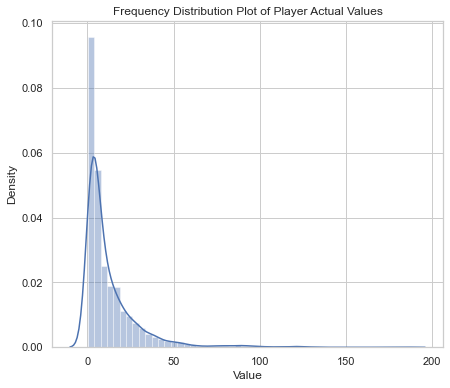

In [58]:
x = player_list.Value
sns.set(style="whitegrid")
plt.figure(figsize=(7,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

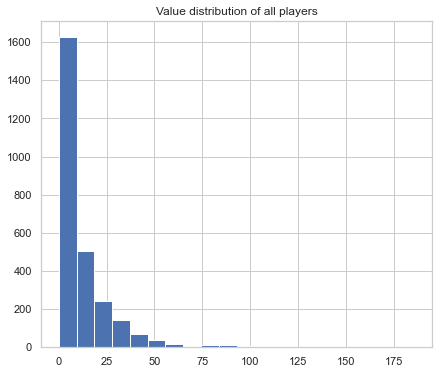

In [62]:
plt.figure(1, figsize=(7, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=20,data=player_list)
plt.title('Value distribution of all players')
plt.show()

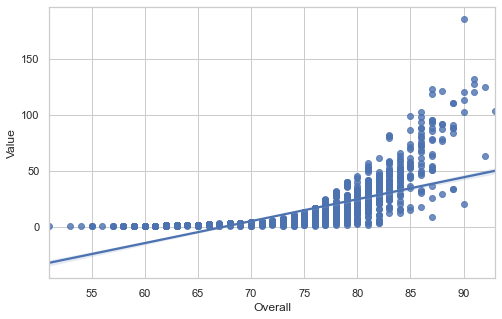

In [71]:
plt.figure(figsize=(8,5))
sns.regplot(x="Overall",y="Value",data=player_list)
plt.show()

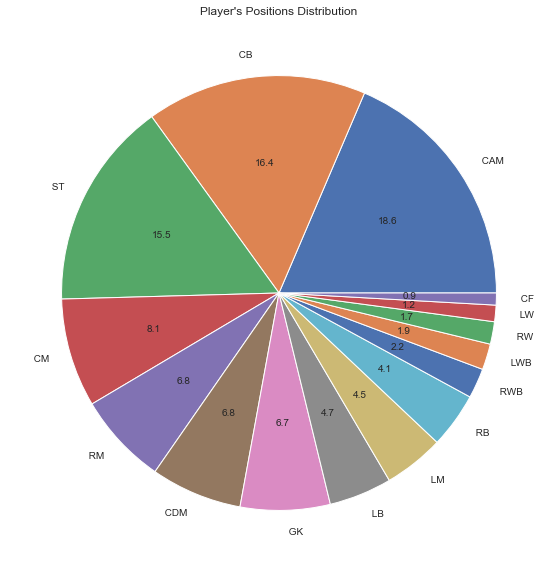

In [72]:
plt.figure(figsize=(10,10))
loc=player_list.Position.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 1500x1500 with 0 Axes>

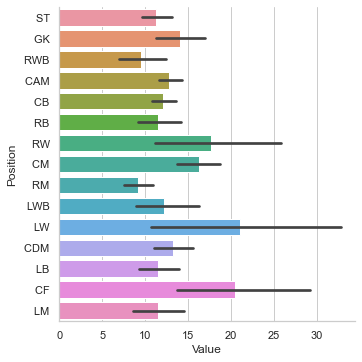

In [76]:
plt.figure(figsize=(15,15),dpi=100)
graph = sns.catplot(y="Position", x="Value", kind="bar",  data=player_list)
plt.show()

# Modelling

In [77]:
#Changing columns order
player_list = player_list[['Name','Value','Age','Overall','Potential','Team','Height','Weight','Foot','Best_Overall',
                           'Position','Growth','Wage','Release_Clause','Attacking','Crossing','Finishing',
                           'Heading_Accuracy','Short_Passing','Volleys','Skill','Dribbling','Curve','FK_Accuracy',
                           'Long_Passing','Ball_Control','Movement','Acceleration','Sprint_Speed','Agility',
                           'Reactions','Balance','Power','Shot_Power','Jumping','Stamina','Strength','Long_Shots',
                           'Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
                           'Defending','Marking','Standing_Tackle','Sliding_Tackle','Goalkeeping','GK_Diving',
                           'GK_Handling','GK_Kicking','GK_Positioning','GK_Reflexes','Total_Stats','Base_Stats',
                           'Int_Reputation','PAC','SHO','PAS','DRI','DEF','PHY']]
player_list

,Name,Value,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
1,E. Shomurodov,2.1,25,69,74,Genoa,190.0,76.0,Right,71,ST,5,0.0090,3.9,337,55,68,74,67,73,319,69,68,52,58,72,357,84,80,68,57,68,328,68,54,67,76,63,284,55,34,65,65,65,60,95,32,33,30,36,8,11,5,7,5,1756,385,1,82,67,62,69,37,68
2,W. Szczęsny,53.0,30,87,87,Juventus,196.0,90.0,Right,87,GK,0,0.1050,87.5,86,12,12,16,32,14,99,11,16,14,36,22,286,51,47,55,82,51,250,55,71,45,65,14,135,40,15,14,48,18,65,45,20,13,12,416,86,82,73,87,88,1317,465,3,86,82,73,88,49,87
4,T. Livramento,0.6,17,60,79,Chelsea,173.0,65.0,Right,60,RWB,19,0.0005,1.5,255,61,46,50,57,41,253,55,51,42,53,52,341,79,73,60,50,79,266,47,62,59,52,46,269,64,57,54,53,41,60,165,52,57,56,56,10,12,8,13,13,1605,345,1,76,46,55,56,55,57
6,B. Brobbey,7.0,18,73,85,Ajax,180.0,91.0,Right,75,ST,12,0.0060,11.2,306,35,75,69,69,58,277,64,49,39,53,72,376,81,85,59,67,84,380,72,88,66,91,63,287,69,26,74,52,66,74,75,28,23,24,57,10,11,15,8,13,1758,385,1,83,71,54,67,30,80
7,I. Moriba,3.6,17,70,85,FC Barcelona,183.0,68.0,Right,72,CAM,15,0.0080,9.6,292,40,72,59,73,48,309,73,46,47,72,71,345,71,74,70,69,61,341,73,59,75,64,70,297,58,66,60,65,48,57,186,59,67,60,60,9,14,15,10,12,1830,403,1,73,69,62,71,63,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,Dalbert,2.0,26,71,71,Stade Rennais FC,183.0,70.0,Left,71,LM,0,0.0470,0.0,307,76,50,60,69,52,329,73,68,47,68,73,370,83,83,75,62,67,326,72,57,74,63,60,305,73,65,65,60,42,70,202,64,71,67,43,7,11,7,9,9,1882,412,1,83,57,67,72,66,67
2787,C. Eiting,3.8,22,71,78,Huddersfield Town,178.0,76.0,Left,73,CM,7,0.0090,0.0,293,77,49,49,78,40,355,69,68,64,80,74,313,55,51,68,72,67,284,68,39,67,50,60,317,62,68,56,75,56,68,184,71,58,55,44,10,6,11,12,5,1790,373,1,53,55,76,70,63,56
2788,L. Gibson,1.1,19,63,76,Reading,185.0,73.0,Left,65,CB,13,0.0070,0.0,220,45,26,58,55,36,238,49,46,36,50,57,286,58,55,49,58,66,267,48,72,52,65,30,240,59,65,33,40,43,68,193,64,66,63,37,9,6,7,10,5,1481,315,1,56,33,48,53,64,61
2789,J. Griffiths,1.2,18,64,79,Cheltenham Town,198.0,87.0,Right,64,GK,15,0.0010,0.0,69,13,8,12,31,5,91,13,14,14,35,15,211,33,35,37,57,49,183,47,57,21,49,9,90,20,12,5,43,10,42,31,7,10,14,317,64,63,63,62,65,992,351,1,64,63,63,65,34,62


In [78]:
#View the correlations
corr_mat = player_list.corr()
corr_mat

,Value,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
Value,1.000000,0.221536,0.732266,0.622598,0.030354,0.092982,0.736244,-0.331860,0.755819,0.971593,0.272499,0.229070,0.208079,0.147063,0.339308,0.230252,0.280517,0.215528,0.249342,0.223723,0.327710,0.267246,0.259402,0.131743,0.150868,0.156397,0.662652,0.103708,0.346661,0.332273,0.143471,0.260270,0.182972,0.225163,0.304882,0.178534,0.153505,0.216106,0.388808,0.190965,0.498989,0.117827,0.148475,0.111610,0.089804,0.047195,0.045663,0.044643,0.048552,0.046821,0.047217,0.406255,0.584638,0.462904,0.207502,0.333237,0.496380,0.468832,0.174638,0.311842
Age,0.221536,1.000000,0.623796,-0.247423,0.090878,0.258771,0.562460,-0.864237,0.409678,0.200489,0.217223,0.160044,0.123670,0.178663,0.205922,0.235649,0.191235,0.046105,0.195813,0.241137,0.261556,0.119827,-0.036465,-0.199820,-0.192143,-0.055006,0.589365,-0.068366,0.324340,0.370439,0.203553,0.040300,0.292173,0.194556,0.289378,0.236144,0.155010,0.129222,0.290825,0.253801,0.473614,0.097393,0.135929,0.084089,0.070074,0.148057,0.144500,0.148571,0.145050,0.149069,0.143459,0.323689,0.488724,0.659015,-0.154292,0.362070,0.469147,0.320734,0.200598,0.388014
Overall,0.732266,0.623796,1.000000,0.457355,0.083201,0.197612,0.986122,-0.746940,0.680982,0.693691,0.340209,0.292421,0.212445,0.234784,0.428911,0.280337,0.342147,0.228362,0.304519,0.282385,0.446326,0.309896,0.231740,0.048177,0.069949,0.122651,0.905930,0.043234,0.494160,0.470813,0.257660,0.312250,0.334424,0.282882,0.428666,0.317665,0.272370,0.238878,0.485650,0.247734,0.684417,0.213686,0.260021,0.198356,0.175529,0.112812,0.110185,0.110741,0.112695,0.112822,0.110280,0.545824,0.814290,0.561466,0.143661,0.439328,0.687716,0.596200,0.321213,0.528704
Potential,0.622598,-0.247423,0.457355,1.000000,0.036728,-0.020624,0.494451,0.249660,0.395040,0.610620,0.067364,0.063629,0.039170,0.016259,0.186652,0.013718,0.107003,0.102992,0.064331,0.030714,0.178953,0.134507,0.182862,0.136809,0.148732,0.100161,0.384024,0.051670,0.104100,0.082591,0.038946,0.154630,0.033885,0.040318,0.096979,0.038489,0.099175,0.036066,0.202947,-0.015522,0.260492,0.086190,0.097044,0.082207,0.075906,0.058956,0.058548,0.056014,0.059274,0.060553,0.056565,0.175578,0.343948,0.139730,0.228137,0.114516,0.271847,0.299401,0.126348,0.145348
Height,0.030354,0.090878,0.083201,0.036728,1.000000,0.758613,0.082207,-0.063137,0.040874,0.026654,-0.350123,-0.510479,-0.380712,0.141900,-0.323201,-0.350206,-0.469293,-0.494218,-0.481259,-0.425399,-0.259151,-0.418000,-0.663997,-0.583392,-0.414666,-0.690516,0.062916,-0.809901,-0.099123,-0.182474,0.166628,-0.286448,0.594388,-0.412889,-0.288474,0.018745,0.011248,-0.444513,-0.367570,-0.306559,-0.153055,0.001346,0.000795,-0.000230,0.003366,0.352121,0.345433,0.347853,0.340943,0.351685,0.350951,-0.351644,-0.055058,0.043166,-0.337767,-0.126900,-0.201810,-0.318836,0.149139,0.525124
Weight,0.092982,0.258771,0.197612,-0.020624,0.758613,1.000000,0.186839,-0.230598,0.117803,0.081709,-0.243822,-0.409671,-0.283442,0.174194,-0.233194,-0.237053,-0.358910,-0.400570,-0.368617,-0.309968,-0.183937,-0.325373,-0.538634,-0.502167,-0.346744,-0.595725,0.163159,-0.654341,0.044805,-0.026335,0.227365,-0.230820,0.666468,-0.291699,-0.184271,0.092363,0.007396,-0.334575,-0.270220,-0.190465,-0.034107,-0.005503,0.005184,-0.010185,-0.010526,0.312419,0.305766,0.307592,0.305061,0.312269,0.310505,-0.223534,0.058005,0.163519,-0.279258,-0.022374,-0.103500,-0.215935,0.131600,0.591752
Best_Overall,0.736244,0.562460,0.986122,0.494451,0.08220

In [80]:
#Correlation With Value (most correlated with positive)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=False).head(10)

,Value
Value,1.000000
Release_Clause,0.971593
Wage,0.755819
Best_Overall,0.736244
Overall,0.732266
Reactions,0.662652
Potential,0.622598
Base_Stats,0.584638
Composure,0.498989
PAS,0.496380


In [81]:
#Correlation With Value (modes correlated with negative)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=True).head(7)

,Value
Growth,-0.331860
Height,0.030354
GK_Handling,0.044643
GK_Diving,0.045663
GK_Positioning,0.046821
Goalkeeping,0.047195
GK_Reflexes,0.047217


In [82]:
# Slice data into feature and target

Xb= player_list.drop(columns=["Value","Name","Team","Foot","Position"])
yb= player_list.loc[:,"Value"]

In [83]:
# fit model with target as player market value 
player_modelb = sm.OLS(yb, Xb, data=player_list)

resultsb = player_modelb.fit()

print(resultsb.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1998.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):                        0.00
Time:                        19:00:44   Log-Likelihood:                         -7120.9
No. Observations:                2698   AIC:                                  1.434e+04
Df Residuals:                    2649   BIC:                                  1.463e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [85]:
#coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(Xb,yb)
coeff_df = pd.DataFrame(regressor.coef_, Xb.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False).T

,Wage,Int_Reputation,Release_Clause,Overall,Potential,DEF,PAC,PAS,Balance,GK_Kicking,Weight,Strength,Dribbling,Volleys,Aggression,Agility,Positioning,Base_Stats,Height,Composure,Finishing,Power,FK_Accuracy,Stamina,Shot_Power,GK_Handling,Mentality,Marking,Attacking,GK_Diving,Skill,Movement,Heading_Accuracy,Sliding_Tackle,Reactions,Goalkeeping,Total_Stats,Long_Shots,Penalties,Curve,Interceptions,GK_Positioning,Standing_Tackle,Ball_Control,Defending,Short_Passing,Vision,Crossing,Acceleration,Long_Passing,Jumping,SHO,Sprint_Speed,GK_Reflexes,DRI,PHY,Best_Overall,Growth,Age
Coefficient,35.493148,1.297363,0.409602,0.404186,0.176026,0.067488,0.058947,0.042742,0.035634,0.029521,0.028946,0.028907,0.026336,0.024076,0.017993,0.017346,0.016762,0.016403,0.01589,0.015818,0.015605,0.011851,0.010922,0.007243,0.006506,0.005433,0.003592,0.002898,0.000237,-0.002473,-0.0029,-0.003415,-0.003953,-0.004221,-0.004315,-0.004552,-0.005158,-0.005717,-0.006189,-0.00692,-0.006951,-0.00804,-0.008646,-0.009443,-0.00997,-0.015108,-0.018024,-0.020383,-0.023256,-0.023795,-0.025088,-0.028171,-0.028824,-0.028993,-0.043186,-0.081417,-0.172231,-0.22816,-0.472262


In [88]:
#Prediction on all data and calculating difference between actual value and predicted value
y_pred = regressor.predict(Xb)
df = pd.DataFrame({'Name':player_list.Name,'Actual': yb, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
df_under

,Actual,Predicted,Difference
Name,,,
L. Messi,103.5,117.73,-14.23
Sergio Ramos,33.5,45.68,-12.18
19 Malcom,31.0,42.00,-11.00
O. Dembélé,57.5,67.33,-9.83
L. Modrić,36.5,45.91,-9.41
Coutinho,36.5,45.39,-8.89
Piqué,32.5,40.94,-8.44
E. Hazard,66.5,74.49,-7.99
Marco Asensio,41.5,49.27,-7.77


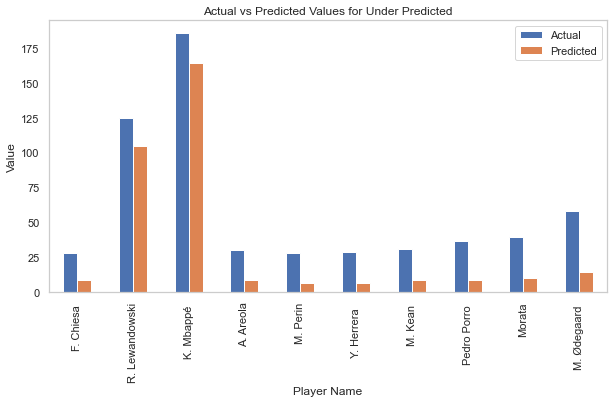

In [89]:
#Plot the comparision of Actual and Predicted Values for Under Predicted
df_over[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Under Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

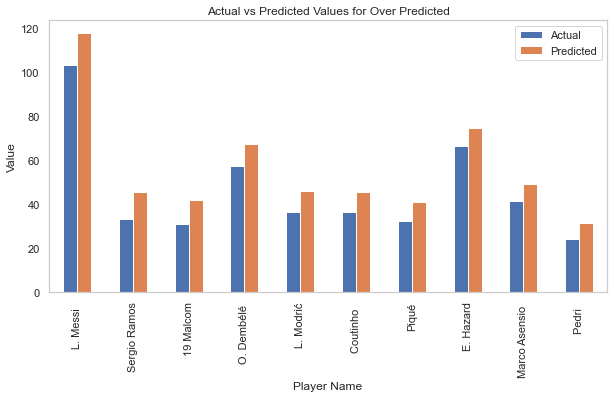

In [90]:
#Plot the comparision of Actual and Predicted Values for Over Predicted

df_under[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Over Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

In [94]:
#Calculating MAE, MSE, RMSE and R^2 values of model
print('Mean Absolute Error:', metrics.mean_absolute_error(yb, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yb, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yb, y_pred)))
print('Linear Regression R^2:',regressor.score(Xb,yb))

Mean Absolute Error: 2.076406526525087
Mean Squared Error: 11.368039815041795
Root Mean Squared Error: 3.371652386448193
Linear Regression R^2: 0.958998108998457


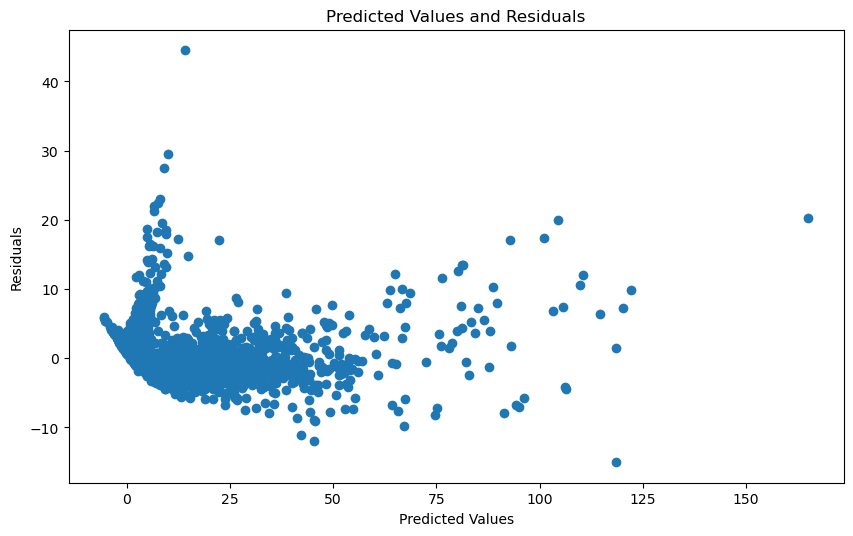

In [95]:
#Plotting Residuals
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(resultsb.predict(), resultsb.resid);
plt.title("Predicted Values and Residuals")
plt.ylabel("Residuals")
plt.xlabel("Predicted Values")
plt.show()

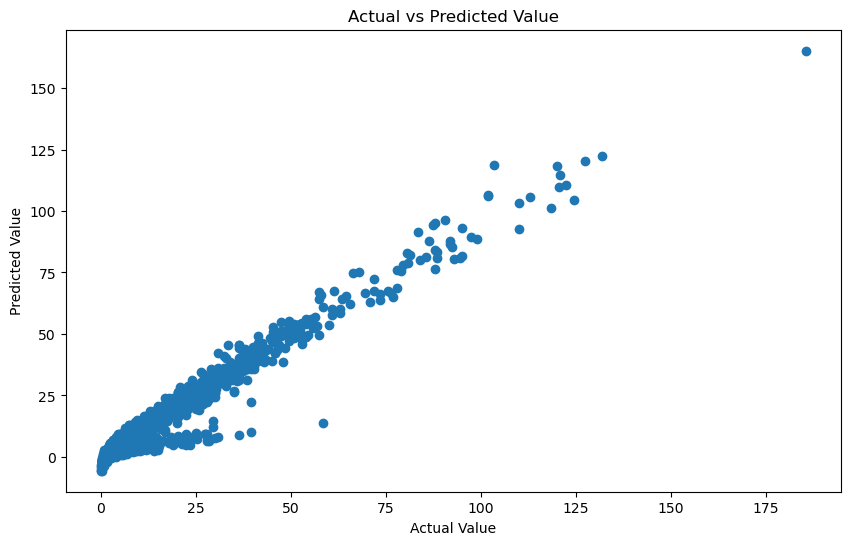

In [97]:
# Actual Values vs Predicted Values
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(yb, resultsb.predict(Xb))
plt.title ("Actual vs Predicted Value")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [98]:
#Model based on most selected columns

X1= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause']]
y1= player_list.loc[:,"Value"]

player_model1 = sm.OLS(y1, X1, data=player_list)

results1 = player_model1.fit()

print(results1.summary());

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          1.776e+04
Date:                Tue, 03 Aug 2021   Prob (F-statistic):                        0.00
Time:                        19:14:23   Log-Likelihood:                         -7270.0
No. Observations:                2698   AIC:                                  1.455e+04
Df Residuals:                    2693   BIC:                                  1.458e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [100]:
#Correlation matrix of selected features
player_list_selected_features= player_list[['Overall','Age','Int_Reputation','Growth','Release_Clause','Height','Weight']]

player_list_selected_features.corr()

,Overall,Age,Int_Reputation,Growth,Release_Clause,Height,Weight
Overall,1.000000,0.623796,0.561466,-0.746940,0.693691,0.083201,0.197612
Age,0.623796,1.000000,0.659015,-0.864237,0.200489,0.090878,0.258771
Int_Reputation,0.561466,0.659015,1.000000,-0.506903,0.425448,0.043166,0.163519
Growth,-0.746940,-0.864237,-0.506903,1.000000,-0.298811,-0.063137,-0.230598
Release_Clause,0.693691,0.200489,0.425448,-0.298811,1.000000,0.026654,0.081709
Height,0.083201,0.090878,0.043166,-0.063137,0.026654,1.000000,0.758613
Weight,0.197612,0.258771,0.163519,-0.230598,0.081709,0.758613,1.000000


<Figure size 1800x700 with 0 Axes>

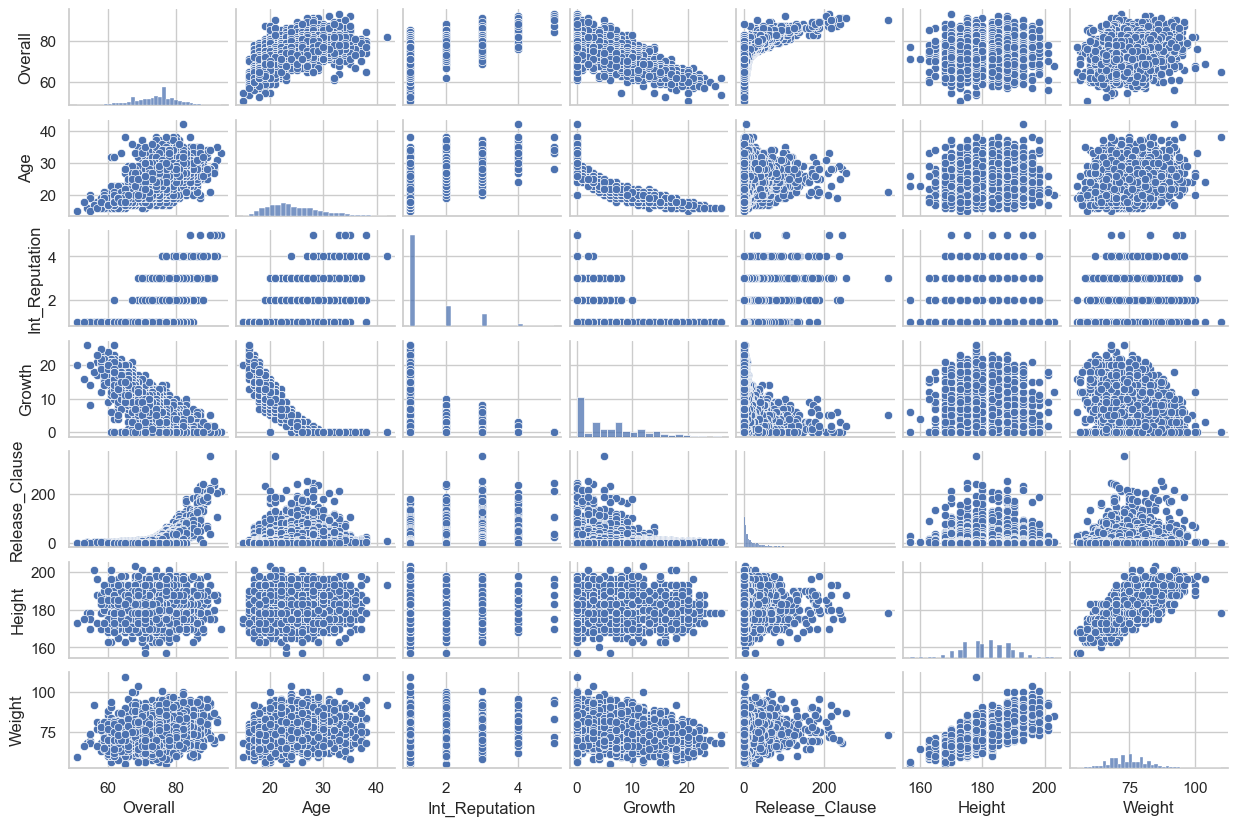

In [101]:
#Pairplot of selected features
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
g=sns.pairplot(player_list_selected_features, height=1.2, aspect=1.5)
plt.yticks(rotation=90); 
plt.show()

In [102]:
#Split data into train, test and validation (%60 - %20)

X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,y1, test_size=.25, random_state=10)

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_val)
mse = np.mean((pred-y_val)**2)

print(lr.score(X_test,y_test))
print(mse)
print(lr.coef_)

0.9394249409744082
13.537333347338745
[ 0.4211799  -0.43211762  1.7598756  -0.06215926  0.43186963]


In [103]:
coeff = pd.DataFrame(X_train.columns)

coeff['CoefficientEstimate'] = lr.coef_

coeff.sort_values("CoefficientEstimate")

,0,CoefficientEstimate
1,Age,-0.432118
3,Growth,-0.062159
0,Overall,0.421180
4,Release_Clause,0.431870
2,Int_Reputation,1.759876


In [106]:
#4 models to choose from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that can run ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that can run poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(Xb.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(X1, y1):.3f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.3f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.3f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
print(f'Degree 2 polynomial regression for validayion data R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression for all data R^2: 0.955
Linear Regression for test data R^2: 0.939
Linear Regression for validation data R^2: 0.953

Ridge Regression for test data R^2: 0.938
Ridge Regression for validation data R^2: 0.951

Lasso Regression for test data R^2: 0.907471
Lasso Regression for validation data R^2: 0.923664

Degree 2 polynomial regression for test data R^2: 0.977
Degree 2 polynomial regression for validayion data R^2: 0.981


In [107]:
model= sm.OLS(y1, X1, data=player_list_selected_features)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          1.776e+04
Date:                Tue, 03 Aug 2021   Prob (F-statistic):                        0.00
Time:                        19:21:22   Log-Likelihood:                         -7270.0
No. Observations:                2698   AIC:                                  1.455e+04
Df Residuals:                    2693   BIC:                                  1.458e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [108]:
# Dummy Variables for Position
X2 = pd.concat([player_list.drop('Position', axis=1), pd.get_dummies(player_list['Position'])],axis=1)

X2 = X2.drop(columns=["Value","Name","Team","Foot"])

y2 = yb= player_list.loc[:,"Value"]

In [109]:
# fit model with target as player market value 
player_model2 = sm.OLS(y2, X2, data=player_list)

results2 = player_model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     982.5
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:21:56   Log-Likelihood:                -7101.4
No. Observations:                2698   AIC:                         1.433e+04
Df Residuals:                    2634   BIC:                         1.471e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.4725      0.041  

In [110]:
# Dummy Variables for Team

X3 = pd.concat([player_list.drop('Team', axis=1), pd.get_dummies(player_list['Team'])],axis=1)

X3 = X3.drop(columns=["Value","Name","Position","Foot"])

y3 = yb= player_list.loc[:,"Value"]

In [111]:
# fit model with target as player market value 
player_model3 = sm.OLS(y3, X3, data=player_list)

results3 = player_model3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     144.6
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:22:45   Log-Likelihood:                -6745.0
No. Observations:                2698   AIC:                         1.444e+04
Df Residuals:                    2222   BIC:                         1.725e+04
Df Model:                         475                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Age         

In [113]:
#Run Cross Validation

lm = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state = 100)
cross_val_score(lm, X1, y1, cv=kf, scoring='r2')

print(round(np.mean(cross_val_score(lm, Xb, yb, cv=kf, scoring='r2')),3))

0.952


In [114]:
#set up the model with log value

X1= player_list.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause',]]
y1= player_list.loc[:,"Value"]

yl = np.log1p(y1)

player_model1 = sm.OLS(yl, X1, data=player_list)

results1 = player_model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          2.879e+04
Date:                Tue, 03 Aug 2021   Prob (F-statistic):                        0.00
Time:                        19:43:20   Log-Likelihood:                         -466.64
No. Observations:                2698   AIC:                                      945.3
Df Residuals:                    2692   BIC:                                      980.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Overall            0.1171      0.002     73.606      0.000       0.114       0.120
Age               -0.0890      0.002    -37.178      0.000      -0.094      -0.084
Weight             0.0155      0.001     13.932      0.000       0.013       0.018
Height            -0.0307      0.001    -32.748      0.000      -0.033      -0.029
Growth            -0.0363      0.002    -18.172      0.000      -0.040      -0.032
Release_Clause     0.0087      0.000     35.508      0.000       0.008       0.009
==============================================================================
Omnibus:                       91.124   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.895
Skew:                          -0.261   Prob(JB):                     5.74e-37
Kurtosis:                       4.101   Cond. No.                         111.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
#coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(X1,yl)
coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False)

,Coefficient
Overall,0.159979
Growth,0.007145
Release_Clause,0.004826
Weight,-0.000359
Height,-0.001882
Age,-0.064230


In [116]:
#Prediction on all data and calculate difference between tha actual value and predicted value
#ye=np.exp(yl)
y_pred = regressor.predict(X1)
df = pd.DataFrame({'Name':player_list.Name,'Actual': yl, 'Predicted': (y_pred)})
df['Actual_n'] = np.expm1(df['Actual'])
df['Predicted_n'] = np.expm1(df['Predicted'])

#df_under = round(df.sort_values('Difference_n').set_index('Name').head(10),2)
#df_over = round(df.sort_values('Difference_n').set_index('Name').tail(10),2)
df

,Name,Actual,Predicted,Actual_n,Predicted_n
1,E. Shomurodov,1.131402,1.131933,2.1,2.101647
2,W. Szczęsny,3.988984,4.041782,53.0,55.927672
4,T. Livramento,0.470004,0.330350,0.6,0.391455
6,B. Brobbey,2.079442,2.320124,7.0,9.176940
7,I. Moriba,1.526056,1.920751,3.6,5.826083
...,...,...,...,...,...
2786,Dalbert,1.098612,1.348444,2.0,2.851428
2787,C. Eiting,1.568616,1.662629,3.8,4.273157
2788,L. Gibson,0.741937,0.606265,1.1,0.833570
2789,J. Griffiths,0.788457,0.815271,1.2,1.259789


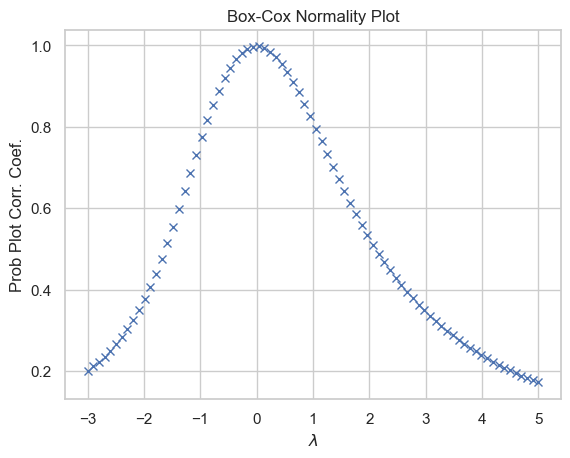

In [117]:
# plot to show optimal lambda values
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(player_list.Value, -3, 5, plot=ax)

# Model

In [120]:
X1= player_list.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause',]]
y1= player_list.loc[:,"Value"]

yl = np.log1p(y1)

X_train, X_test, y_train, y_test = train_test_split(X1,yl,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,yl, test_size=.25, random_state=10)


lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(Xb.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(X1, yl):.6f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.6f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.6f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.6f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.6f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.6f}')
print(f'Degree 2 polynomial regression for validation data R^2: {lm_poly.score(X_val_poly, y_val):.6f}')

Linear Regression for all data R^2: 0.952667
Linear Regression for test data R^2: 0.948504
Linear Regression for validation data R^2: 0.951210

Ridge Regression for test data R^2: 0.939674
Ridge Regression for validation data R^2: 0.941765

Lasso Regression for test data R^2: -0.000009
Lasso Regression for validation data R^2: -0.000296

Degree 2 polynomial regression for test data R^2: 0.982839
Degree 2 polynomial regression for validation data R^2: 0.984270


In [121]:
#Run Cross Validation

lm = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state = 10)
cross_val_score(lm, X1, yl, cv=kf, scoring='r2')

print(round(np.mean(cross_val_score(lm, X1, yl, cv=kf, scoring='r2')),5))

0.95166


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


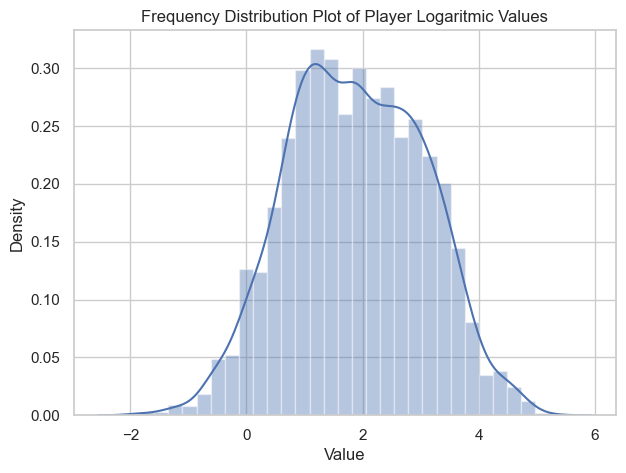

In [124]:
x = player_list.Value
x = np.log(x)
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Logaritmic Values')
plt.show()

In [127]:
player_list["Value_log"] = np.log(player_list["Value"])
player_list

<ipython-input-127-38ff200f67a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_list["Value_log"] = np.log(player_list["Value"])


,Name,Value,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Value_log
1,E. Shomurodov,2.1,25,69,74,Genoa,190.0,76.0,Right,71,ST,5,0.0090,3.9,337,55,68,74,67,73,319,69,68,52,58,72,357,84,80,68,57,68,328,68,54,67,76,63,284,55,34,65,65,65,60,95,32,33,30,36,8,11,5,7,5,1756,385,1,82,67,62,69,37,68,0.741937
2,W. Szczęsny,53.0,30,87,87,Juventus,196.0,90.0,Right,87,GK,0,0.1050,87.5,86,12,12,16,32,14,99,11,16,14,36,22,286,51,47,55,82,51,250,55,71,45,65,14,135,40,15,14,48,18,65,45,20,13,12,416,86,82,73,87,88,1317,465,3,86,82,73,88,49,87,3.970292
4,T. Livramento,0.6,17,60,79,Chelsea,173.0,65.0,Right,60,RWB,19,0.0005,1.5,255,61,46,50,57,41,253,55,51,42,53,52,341,79,73,60,50,79,266,47,62,59,52,46,269,64,57,54,53,41,60,165,52,57,56,56,10,12,8,13,13,1605,345,1,76,46,55,56,55,57,-0.510826
6,B. Brobbey,7.0,18,73,85,Ajax,180.0,91.0,Right,75,ST,12,0.0060,11.2,306,35,75,69,69,58,277,64,49,39,53,72,376,81,85,59,67,84,380,72,88,66,91,63,287,69,26,74,52,66,74,75,28,23,24,57,10,11,15,8,13,1758,385,1,83,71,54,67,30,80,1.945910
7,I. Moriba,3.6,17,70,85,FC Barcelona,183.0,68.0,Right,72,CAM,15,0.0080,9.6,292,40,72,59,73,48,309,73,46,47,72,71,345,71,74,70,69,61,341,73,59,75,64,70,297,58,66,60,65,48,57,186,59,67,60,60,9,14,15,10,12,1830,403,1,73,69,62,71,63,65,1.280934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,Dalbert,2.0,26,71,71,Stade Rennais FC,183.0,70.0,Left,71,LM,0,0.0470,0.0,307,76,50,60,69,52,329,73,68,47,68,73,370,83,83,75,62,67,326,72,57,74,63,60,305,73,65,65,60,42,70,202,64,71,67,43,7,11,7,9,9,1882,412,1,83,57,67,72,66,67,0.693147
2787,C. Eiting,3.8,22,71,78,Huddersfield Town,178.0,76.0,Left,73,CM,7,0.0090,0.0,293,77,49,49,78,40,355,69,68,64,80,74,313,55,51,68,72,67,284,68,39,67,50,60,317,62,68,56,75,56,68,184,71,58,55,44,10,6,11,12,5,1790,373,1,53,55,76,70,63,56,1.335001
2788,L. Gibson,1.1,19,63,76,Reading,185.0,73.0,Left,65,CB,13,0.0070,0.0,220,45,26,58,55,36,238,49,46,36,50,57,286,58,55,49,58,66,267,48,72,52,65,30,240,59,65,33,40,43,68,193,64,66,63,37,9,6,7,10,5,1481,315,1,56,33,48,53,64,61,0.095310
2789,J. Griffiths,1.2,18,64,79,Cheltenham Town,198.0,87.0,Right,64,GK,15,0.0010,0.0,69,13,8,12,31,5,91,13,14,14,35,15,211,33,35,37,57,49,183,47,57,21,49,9,90,20,12,5,43,10,42,31,7,10,14,317,64,63,63,62,65,992,351,1,64,63,63,65,34,62,0.182322


In [128]:
Xs= player_list.loc[:,['Overall','Age','Growth','Release_Clause', 'Weight','Height']]
ys= player_list.loc[:,"Value_log"]

player_models = sm.OLS(ys, Xs, data=player_list)

resultss = player_models.fit()

print(resultss.summary());

                                 OLS Regression Results                                
Dep. Variable:              Value_log   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          1.680e+04
Date:                Tue, 03 Aug 2021   Prob (F-statistic):                        0.00
Time:                        19:52:56   Log-Likelihood:                         -1054.9
No. Observations:                2698   AIC:                                      2122.
Df Residuals:                    2692   BIC:                                      2157.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [129]:
player_list["Value_logp"]=np.log1p(player_list["Value"])
player_list

<ipython-input-129-1178024b9622>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_list["Value_logp"]=np.log1p(player_list["Value"])


,Name,Value,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Value_log,Value_logp
1,E. Shomurodov,2.1,25,69,74,Genoa,190.0,76.0,Right,71,ST,5,0.0090,3.9,337,55,68,74,67,73,319,69,68,52,58,72,357,84,80,68,57,68,328,68,54,67,76,63,284,55,34,65,65,65,60,95,32,33,30,36,8,11,5,7,5,1756,385,1,82,67,62,69,37,68,0.741937,1.131402
2,W. Szczęsny,53.0,30,87,87,Juventus,196.0,90.0,Right,87,GK,0,0.1050,87.5,86,12,12,16,32,14,99,11,16,14,36,22,286,51,47,55,82,51,250,55,71,45,65,14,135,40,15,14,48,18,65,45,20,13,12,416,86,82,73,87,88,1317,465,3,86,82,73,88,49,87,3.970292,3.988984
4,T. Livramento,0.6,17,60,79,Chelsea,173.0,65.0,Right,60,RWB,19,0.0005,1.5,255,61,46,50,57,41,253,55,51,42,53,52,341,79,73,60,50,79,266,47,62,59,52,46,269,64,57,54,53,41,60,165,52,57,56,56,10,12,8,13,13,1605,345,1,76,46,55,56,55,57,-0.510826,0.470004
6,B. Brobbey,7.0,18,73,85,Ajax,180.0,91.0,Right,75,ST,12,0.0060,11.2,306,35,75,69,69,58,277,64,49,39,53,72,376,81,85,59,67,84,380,72,88,66,91,63,287,69,26,74,52,66,74,75,28,23,24,57,10,11,15,8,13,1758,385,1,83,71,54,67,30,80,1.945910,2.079442
7,I. Moriba,3.6,17,70,85,FC Barcelona,183.0,68.0,Right,72,CAM,15,0.0080,9.6,292,40,72,59,73,48,309,73,46,47,72,71,345,71,74,70,69,61,341,73,59,75,64,70,297,58,66,60,65,48,57,186,59,67,60,60,9,14,15,10,12,1830,403,1,73,69,62,71,63,65,1.280934,1.526056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,Dalbert,2.0,26,71,71,Stade Rennais FC,183.0,70.0,Left,71,LM,0,0.0470,0.0,307,76,50,60,69,52,329,73,68,47,68,73,370,83,83,75,62,67,326,72,57,74,63,60,305,73,65,65,60,42,70,202,64,71,67,43,7,11,7,9,9,1882,412,1,83,57,67,72,66,67,0.693147,1.098612
2787,C. Eiting,3.8,22,71,78,Huddersfield Town,178.0,76.0,Left,73,CM,7,0.0090,0.0,293,77,49,49,78,40,355,69,68,64,80,74,313,55,51,68,72,67,284,68,39,67,50,60,317,62,68,56,75,56,68,184,71,58,55,44,10,6,11,12,5,1790,373,1,53,55,76,70,63,56,1.335001,1.568616
2788,L. Gibson,1.1,19,63,76,Reading,185.0,73.0,Left,65,CB,13,0.0070,0.0,220,45,26,58,55,36,238,49,46,36,50,57,286,58,55,49,58,66,267,48,72,52,65,30,240,59,65,33,40,43,68,193,64,66,63,37,9,6,7,10,5,1481,315,1,56,33,48,53,64,61,0.095310,0.741937
2789,J. Griffiths,1.2,18,64,79,Cheltenham Town,198.0,87.0,Right,64,GK,15,0.0010,0.0,69,13,8,12,31,5,91,13,14,14,35,15,211,33,35,37,57,49,183,47,57,21,49,9,90,20,12,5,43,10,42,31,7,10,14,317,64,63,63,62,65,992,351,1,64,63,63,65,34,62,0.182322,0.788457


In [131]:
Xs= player_list.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause','Height','Weight']]
ys= player_list.loc[:,"Value_log"]

#Split data train (%60), test(%20) and validation (%20)
X, X_test, y, y_test = train_test_split(Xs,ys,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.25, random_state=10)


lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

Xs_poly = poly.fit_transform(X.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(Xs, ys):.6f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.6f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.6f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.6f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.6f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.6f}')
print(f'Degree 2 polynomial regression for validation data R^2: {lm_poly.score(X_val_poly, y_val):.6f}')

Linear Regression for all data R^2: 0.963547
Linear Regression for test data R^2: 0.959083
Linear Regression for validation data R^2: 0.960037

Ridge Regression for test data R^2: 0.949430
Ridge Regression for validation data R^2: 0.955337

Lasso Regression for test data R^2: -0.000415
Lasso Regression for validation data R^2: -0.004070

Degree 2 polynomial regression for test data R^2: 0.981919
Degree 2 polynomial regression for validation data R^2: 0.980985


In [132]:
# Run Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state = 16)
cross_val_score(lm, Xs, ys, cv=kf, scoring='r2')

print('Linear Regression:',round(np.mean(cross_val_score(lm, Xs, ys, cv=kf, scoring='r2')),5))
print('Ridge Regression:',round(np.mean(cross_val_score(lm_reg, Xs, ys, cv=kf, scoring='r2')),5))
print('Lasso Regression:',round(np.mean(cross_val_score(lm_lasso, Xs, ys, cv=kf, scoring='r2')),5))
print('Degree 2 Poly. Regression:',round(np.mean(cross_val_score(lm_poly, Xs, ys, cv=kf, scoring='r2')),5))

Linear Regression: 0.96324
Ridge Regression: 0.95308
Lasso Regression: -0.00592
Degree 2 Poly. Regression: 0.96324


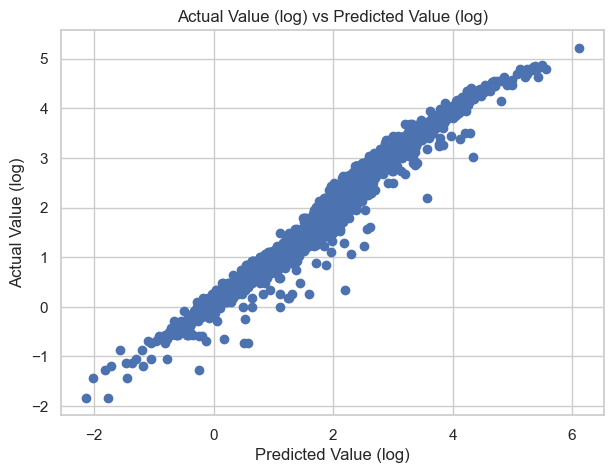

In [136]:
# Regression Fit with Log
plt.figure(figsize=(7,5),dpi=100),
lr = LinearRegression()
fit = lr.fit(Xs,ys);
pred = lr.predict(Xs)
plt.scatter(pred,ys)
plt.title("Actual Value (log) vs Predicted Value (log)")
plt.xlabel("Predicted Value (log)")
plt.ylabel("Actual Value (log)")
plt.show()

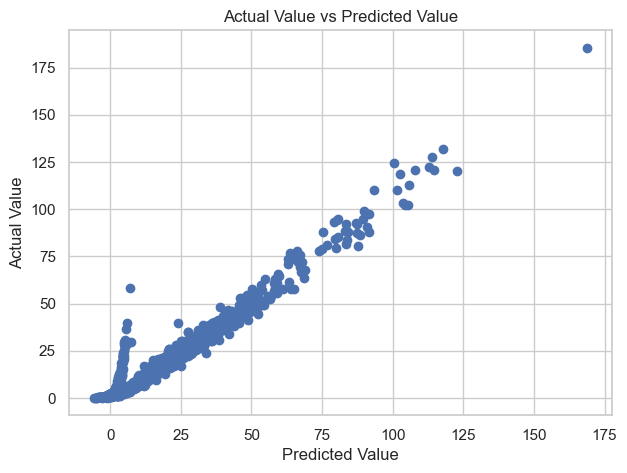

In [138]:
# Regression Fit with Log
plt.figure(figsize=(7,5),dpi=100),
lr = LinearRegression()
fit = lr.fit(Xs,np.exp(ys));
pred = lr.predict(Xs)
plt.scatter(pred,np.exp(ys))
plt.title("Actual Value vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

In [139]:
ys

1       0.741937
2       3.970292
4      -0.510826
6       1.945910
7       1.280934
          ...   
2786    0.693147
2787    1.335001
2788    0.095310
2789    0.182322
2790    0.530628
Name: Value_log, Length: 2698, dtype: float64